# Author :  Sofianos Lampropoulos



1) We Consider the dataset `cities_USA.csv` that contains longtitude and latitude data for 400 cities in the US. Each city is labeled as red or blue depending on how they voted in the 2012 election. Apply decision tree classifier a) display the decision tree, b) the rules obtained, and c) the accuracy achieved.

2) We Consider the dataset `kc_house_data.csv`and apply decision tree regressor and access its accuracy.




# Classification Trees

We will start by talking about classification decision trees (also known as classification trees). For this example, we will be using the Iris dataset, a classic in the field of machine learning. It contains the measurements of 150 Iris flowers from three different species — Setosa, Versicolor, and Virginica. These will be our targets. Our goal is to predict which category an Iris flower belongs to. The petal length and width in centimeters are stored as columns, which we also call the features of the dataset.

In [354]:
# First, we'll import pandas, a data processing and CSV file I/O library
import pandas as pd
 
# We'll also import seaborn, a Python graphing library
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)
 
# Next, we'll load the Iris flower dataset, which is in the "../input/" directory
iris = pd.read_csv("iris.csv") # the iris dataset is now a Pandas DataFrame
 
# Let's see what's in the iris data - Jupyter notebooks print the result of the last thing you do
iris.head()
 
# Press shift+enter to execute this cell

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


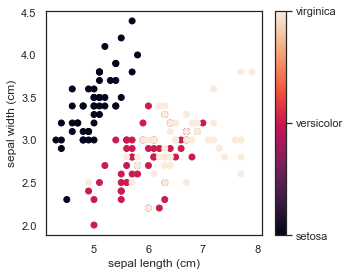

In [355]:
# Load the data
from sklearn.datasets import load_iris
iris = load_iris()

from matplotlib import pyplot as plt

# The indices of the features that we are plotting
x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()

Automatically created module for IPython interactive environment


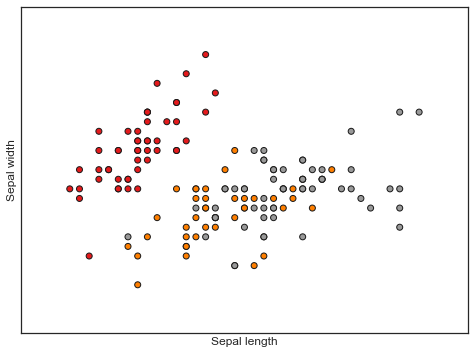

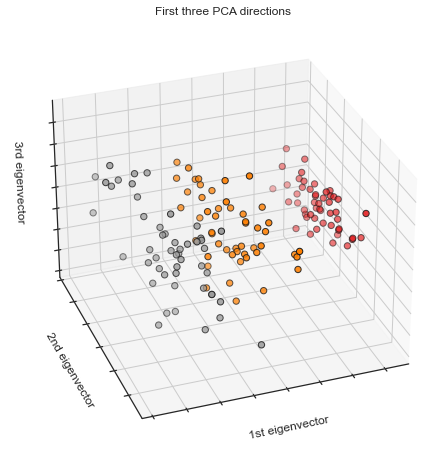

In [356]:
print(__doc__)


# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [357]:
from sklearn import datasets

iris = datasets.load_iris()                        # Load iris dataset

X = iris.data[:, [2, 3]]                           # Assign matrix X
y = iris.target                                    # Assign vector y

In [358]:
from sklearn.tree import DecisionTreeClassifier    # Import decision tree classifier model

tree = DecisionTreeClassifier(criterion='entropy', # Initialize and fit classifier
    max_depth=4, random_state=1)
tree.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=1)

Notice that we set the criterion as `entropy`. This criterion is known as the impurity measure (mentioned in the previous section). In classification, entropy is the most common impurity measure or splitting criteria. It is defined by:
$$
E(t)=-\sum_{i=1}^{c} p(i | t) \log _{2} p(i | t)
$$
Here, p(i|t) is the proportion of the samples that belong to class c for a particular node t. The entropy is therefore 0 if all samples at a node belong to the same class, and the entropy is maximal if we have a uniform class distribution.

For a more visual understanding of entropy, let’s plot the impurity index for the probability range [0, 1] for class 1. The code is as follows:

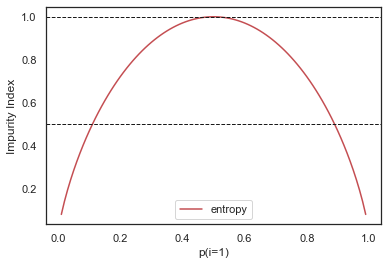

In [359]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2(1 - p)

x = np.arange(0.0, 1.0, 0.01)                      # Create dummy data
e = [entropy(p) if p != 0 else None for p in x]    # Calculate entropy

plt.plot(x, e, label='entropy', color='r')         # Plot impurity indices
for y in [0.5, 1.0]:
    plt.axhline(y=y, linewidth=1,
                color='k', linestyle='--')
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.legend()
plt.show()

Using scikit-learn, we will now train a decision tree with a maximum depth of 4. The code is as follows:

In [360]:
!pip install pydotplus

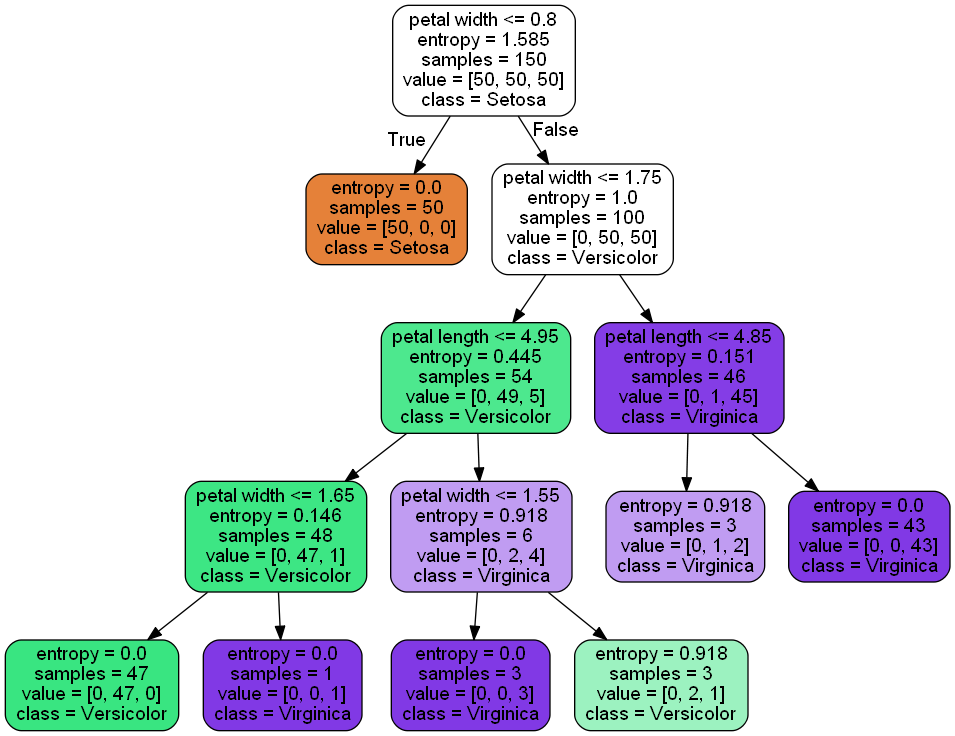

In [361]:
from pydotplus.graphviz import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image

dot_data = export_graphviz(                           # Create dot data
    tree, filled=True, rounded=True,
    class_names=['Setosa', 'Versicolor','Virginica'],
    feature_names=['petal length', 'petal width'],
    out_file=None
)

graph = graph_from_dot_data(dot_data)                 # Create graph from dot data
graph.write_png('hm2-tree.png')                           # Write graph to PNG image
Image(graph.create_png()) 


# Regression Trees

We will be using the Boston Housing dataset for our regression example. This is another very popular dataset which contains information about houses in the suburbs of Boston. There are 506 samples and 14 attributes. 

## Housing Values in Suburbs of Boston

The medv variable is the target variable.
Data description

The Boston data frame has 506 rows and 14 columns.

This data frame contains the following columns:

* `crim` per capita crime rate by town.

* `zn` proportion of residential land zoned for lots over 25,000 sq.ft.

* `indus` proportion of non-retail business acres per town.

* `chas` Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

* `nox` nitrogen oxides concentration (parts per 10 million).

* `rm` average number of rooms per dwelling.

* `age` proportion of owner-occupied units built prior to 1940.

* `dis`  weighted mean of distances to five Boston employment centres.

* `rad` index of accessibility to radial highways.

* `tax` full-value property-tax rate per \$10,000.

* `ptratio` pupil-teacher ratio by town.

* `black` 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

* `lstat` lower status of the population (percent).

* `medv` median value of owner-occupied homes in \$1000s.

For simplicity and visualization purposes, we will only use two — MEDV (median value of owner-occupied homes in $1000s) as the target and LSTAT (percentage of lower status of the population) as the feature.

Let’s first import the necessary attributes from scikit-learn into a pandas DataFrame.

In [362]:
import pandas as pd
from sklearn import datasets

boston = datasets.load_boston()            # Load Boston Dataset
df = pd.DataFrame(boston.data[:, 12])      # Create DataFrame using only the LSAT feature
df.columns = ['LSTAT']
df['MEDV'] = boston.target                 # Create new column with the target MEDV
df.head()

,LSTAT,MEDV
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [363]:
from sklearn.tree import DecisionTreeRegressor    # Import decision tree regression model

X = df[['LSTAT']].values                          # Assign matrix X
y = df['MEDV'].values                             # Assign vector y

sort_idx = X.flatten().argsort()                  # Sort X and y by ascending values of X
X = X[sort_idx]
y = y[sort_idx]

tree = DecisionTreeRegressor(criterion='mse',     # Initialize and fit regressor
                             max_depth=3)         
tree.fit(X, y)

DecisionTreeRegressor(max_depth=3)

Notice that our criterion is different from the one we used for our classification tree. Entropy as a measure of impurity is a useful criteria for classification. To use a decision tree for regression, however, we need an impurity metric that is suitable for continuous variables, so we define the impurity measure using the weighted mean squared error (MSE) of the children nodes instead:

$$
\operatorname{MSE}(t)=\frac{1}{N_{t}} \sum_{i \in D_{t}}\left(y^{(i)}-\hat{y}_{t}\right)^{2}
$$

Here, $N_t$ is the number of training samples at node t, $D_t$ is the training subset at node t, y(i) is the true target value, and $\hat y_t$ is the predicted target value (sample mean):

$$
\hat{y}_{t}=\frac{1}{N_{t}} \sum_{i \in D_{t}} y^{(i)}
$$

Now, let’s model the relationship between MEDV and LSTAT to see what the line fit of a regression tree looks like:

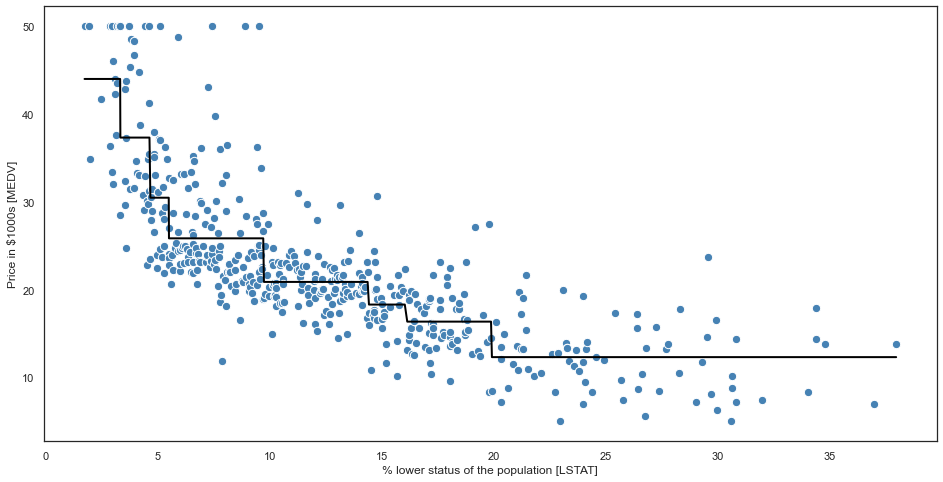

In [364]:
plt.figure(figsize=(16, 8))
plt.scatter(X, y, c='steelblue',                  # Plot actual target against features
            edgecolor='white', s=70)
plt.plot(X, tree.predict(X),                      # Plot predicted target against features
         color='black', lw=2)
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.show()

# 1) Classification

In [371]:
cities = pd.read_csv('cities_USA.csv')

cities.head()

,Unnamed: 0,lon,lat,vote
0,1,-80.162475,25.692104,blue
1,2,-80.214360,25.944083,blue
2,3,-80.094133,26.234314,blue
3,4,-80.248086,26.291902,blue
4,5,-81.789963,26.348035,blue


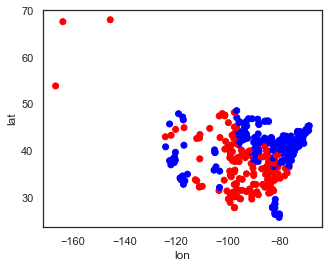

In [372]:
X = cities[['lon', 'lat']]
y = cities['vote']

target_names = ['blue', 'red']

plt.figure(figsize=(5, 4))
plt.scatter(cities['lon'], cities['lat'], c=cities['vote'])
plt.xlabel('lon')
plt.ylabel('lat')
plt.show()


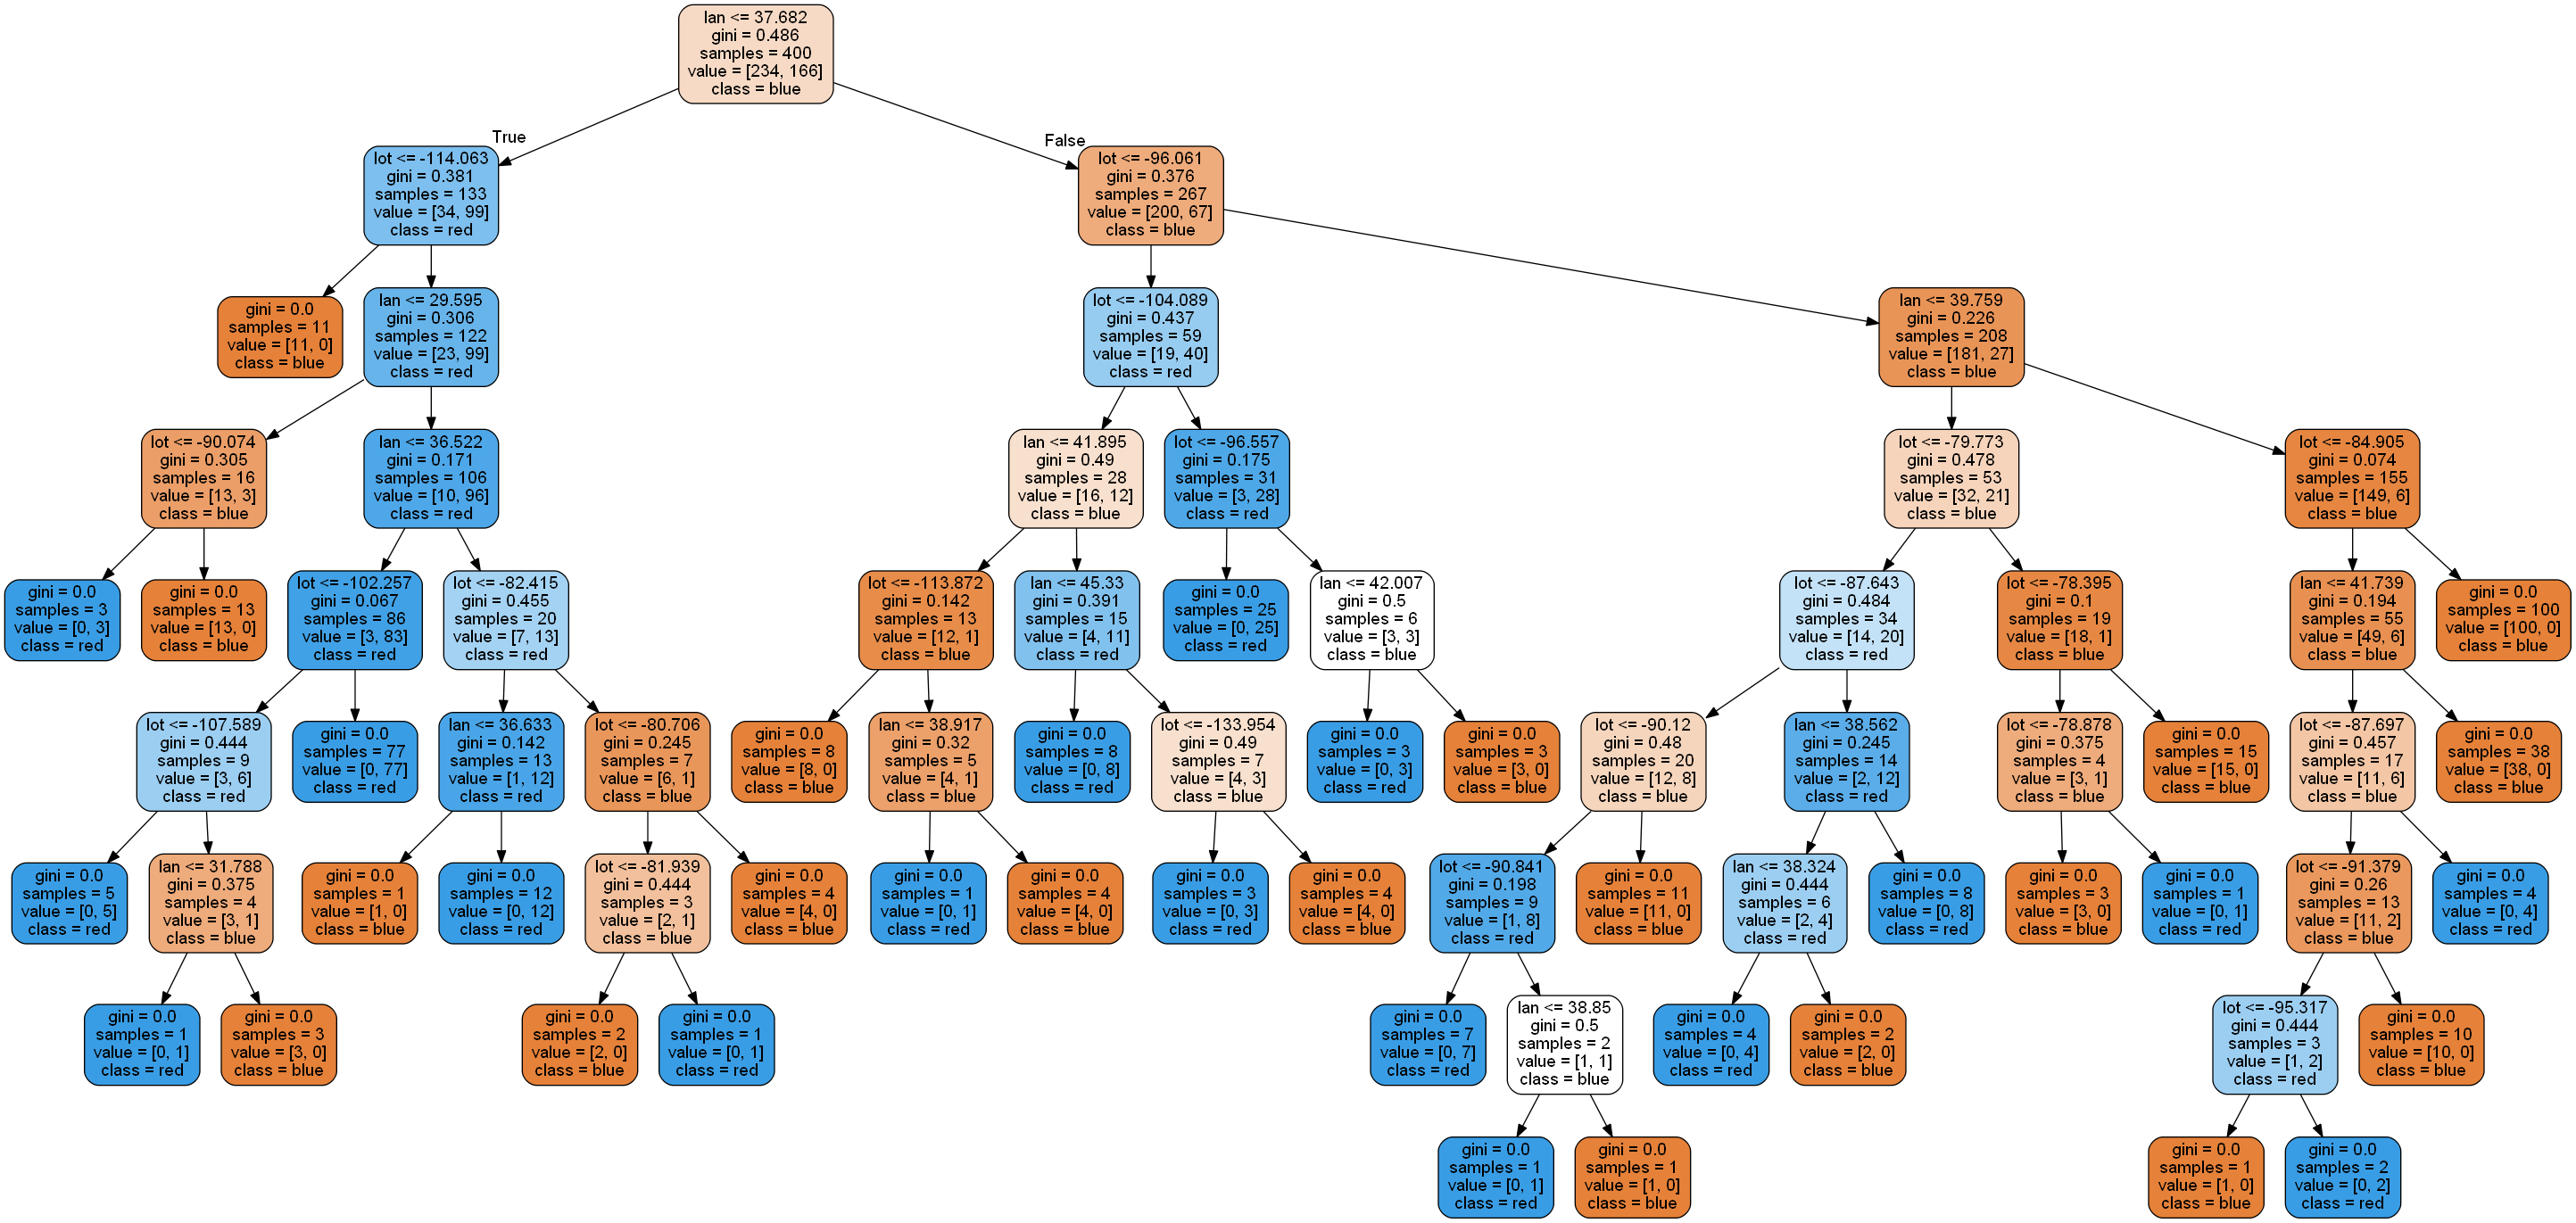

In [385]:
from sklearn.model_selection import train_test_split

tree = DecisionTreeClassifier(criterion='gini', # Initialize and fit classifier
    max_depth=8, random_state=1)

tree = tree.fit(X, y)


dot_data = export_graphviz(                           # Create dot data
    tree, filled=True, rounded=True,
    class_names=target_names,
    feature_names=['lot', 'lan'],
    out_file=None
)

graph = graph_from_dot_data(dot_data)                 # Create graph from dot data
graph.write_png('cities.png')                           # Write graph to PNG image
Image(graph.create_png()) 

In [386]:
print("Accuracy score : " + str(tree.score(X,y)))

Accuracy score : 1.0


# 2) Regression

In [387]:
houses = pd.read_csv('kc_house_data.csv')

houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [388]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above',
           'sqft_basement','yr_built','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15']

X = houses[features]
y = houses['price']

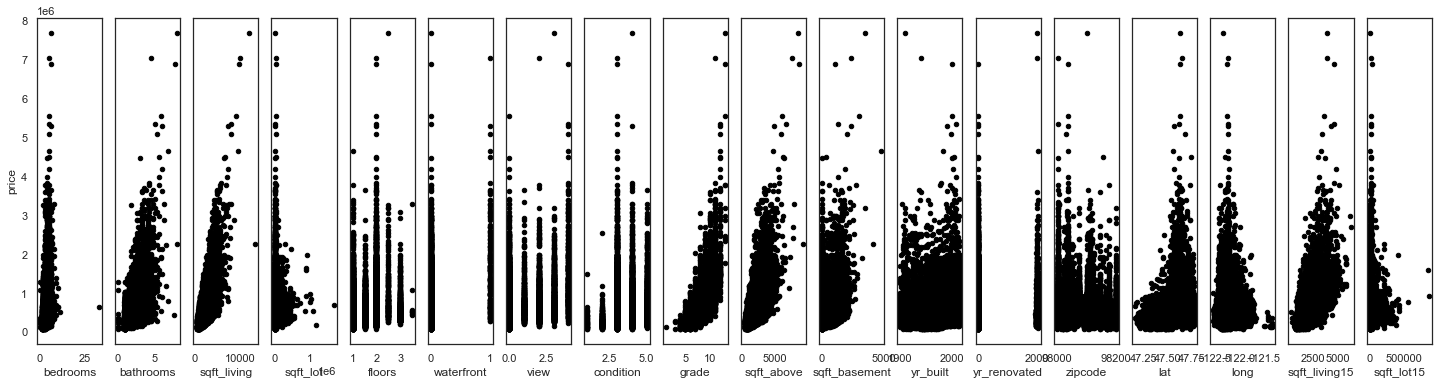

In [389]:
# Scatter plots
fig, axs = plt.subplots(1, len(features), sharey=True)
for index, feature in enumerate(features):
    houses.plot(kind='scatter', x=feature, y='price', ax=axs[index], figsize=(25,6), c = 'black')

In [390]:
from sklearn.tree import DecisionTreeRegressor    # Import decision tree regression model

tree = DecisionTreeRegressor(criterion='mse',     # Initialize and fit regressor
                             max_depth=10)         

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.258905 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.258905 to fit



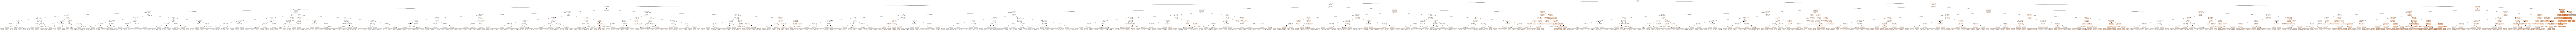

In [391]:
tree = tree.fit(X,y)

dot_data = export_graphviz(                           # Create dot data
    tree, filled=True, rounded=True,
    feature_names=features,
    out_file=None
)

graph = graph_from_dot_data(dot_data)                 # Create graph from dot data
graph.write_png('houses.png')                           # Write graph to PNG image
Image(graph.create_png()) 

In [392]:
print("Accuracy score : " + str(tree.score(X,y)))

Accuracy score : 0.9066109680990492
